# EE460J Lab 1

James Lu, Soroush Famili

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.

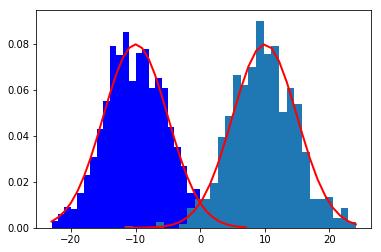

In [2]:
#generate random samples
n = 1000

mean_1 = -10
std_1 = 5
samples_1 = np.random.normal(mean_1, std_1, n)

mean_2 = 10
std_2 = 5
samples_2 = np.random.normal(mean_2, std_2, n)

#plot values
count_1, bins_1, ignored_1 = plt.hist(samples_1, bins=30, density=True, color="blue")
plt.plot(bins_1, 1/(std_1 * np.sqrt(2 * np.pi)) *
            np.exp( - (bins_1 - mean_1)**2 / (2 * std_1**2) ),
            linewidth=2, color='r')
count_2, bins_2, ignored_2 = plt.hist(samples_2, bins=30, density=True)
plt.plot(bins_2, 1/(std_2 * np.sqrt(2 * np.pi)) *
            np.exp( - (bins_2 - mean_2)**2 / (2 * std_2**2) ),
            linewidth=2, color='r')

plt.show()

**(a) Take the sum of 2 these Gaussians by adding the two sets of 1000 points, point by point,
and plot the histogram of the resulting 1000 points. What do you observe?**

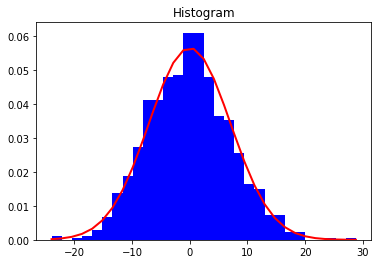

In [3]:
#compute sum
samples = samples_1 + samples_2
mean = 0
std = np.sqrt(50)

#plot values
count, bins, ignored = plt.hist(samples, bins=30, density=True, color="blue")
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
            np.exp( - (bins - mean)**2 / (2 * std**2) ),
            linewidth=2, color='r')

plt.title("Histogram")
plt.show()

I realized that the sum of these samples, which were taken from normal distributions, resulted in what looks like samples from a new normal distribution.

**(b) Estimate the mean and the variance of the sum.**

Because both these samples were taken from normal distributions, the new mean μ is the sum of the previous means (μ = μ<sub>1</sub> + μ<sub>2</sub> ≈ 0), and the new variance σ<sup>2</sup> is the sum of the previous variances (σ<sup>2</sup> = σ<sub>1</sub><sup>2</sup> + σ<sub>2</sub><sup>2</sup> ≈ 50), meaning that the new standard deviation σ ≈ 7.07

In [4]:
print("Validating findings:")
print("μ = ", samples.mean())
print("σ^2 = ", samples.var())
print("σ = ", np.sqrt(samples.var()))

Validating findings:
μ =  -0.07091284499160103
σ^2 =  50.1021026126512
σ =  7.078283874828079


### 2. Central Limit Theorem - Let X<sub>i</sub> be an i.i.d. Bernoulli random variable with value {-1,1}. Look at the random variable Z<sub>n</sub>. By taking 1000 draws from Zn, plot its histogram. Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but when n is bigger (already by the time n = 30 or 50) it looks much more like a Gaussian. Check also for much bigger n: n = 250, to see that at this point, one can really see the bell curve.


In [5]:
# function for generating samples from Z_n
def Z_n(samples, n):
    bernoulli = [-1,1]  #values for bernoulli rv
    result = []
    for i in range(samples):
        sample = 0 #generate sample of Z_n
        for j in range(n):
            sample += np.random.choice(bernoulli)  #sum of bernoulli rvs 
        sample /= np.sqrt(n) #normalize
        result.append(sample)
    
    return result

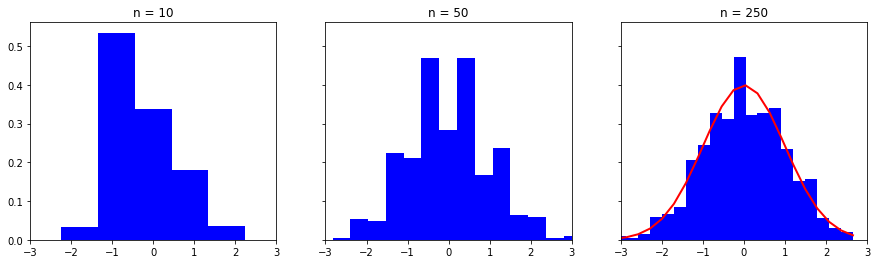

In [6]:
samples = 1000
fig, ax = plt.subplots(1,3, sharex=True, sharey=True)  # three plots
fig.set_figwidth(15)

n = 5  #num. of bernoulli rvs
result = Z_n(samples, n)
count, bins, ignored = ax[0].hist(result, bins=5, density=True, color="blue")
ax[0].title.set_text("n = 10")
ax[0].set_xlim(-3,3)

n = 50
result = Z_n(samples, n)
count, bins, ignored = ax[1].hist(result, bins=15, density=True, color="blue")
ax[1].title.set_text("n = 50")

n = 250
result = Z_n(samples, n)
count, bins, ignored = ax[2].hist(result, bins=20, density=True, color="blue")
ax[2].plot(bins, 1/(1 * np.sqrt(2 * np.pi)) *
            np.exp( - (bins - 0)**2 / (2 * 1**2) ),
            linewidth=2, color='r')
ax[2].title.set_text("n = 250")

plt.show()

### 3. Estimate the mean and standard deviation from 1 dimensional data: generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [7]:
#generate random samples
n = 25000
mean = 0
std = 5
samples = np.random.normal(mean, std, n)

In [8]:
mean_measured = 0  #compute mean for samples
for s in samples:
    mean_measured += s / n
    
var_measured = 0  #compute variance: squared differences from mean
for s in samples:
    var_measured += (s - mean_measured)**2 / n
    
std_measured = np.sqrt(var_measured)  #compute standard deviation

In [9]:
print(mean_measured)
print(std_measured)

-0.03248411366746434
5.009505066748479


### 4. Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution

In [10]:
n = 10000
mean = [-5,5]
covariance = [[20, .8],[.8, 30]]
samples = np.random.multivariate_normal(mean, covariance, n).T

In [11]:
mean_measured = [0, 0]
for s in samples[0]:
    mean_measured[0] += s / n  # compute mean for X
    
for s in samples[1]:
    mean_measured[1] += s / n  # compute mean for y

In [12]:
covariance_measured = [[0,0],[0,0]]
for s in samples[0]:
    covariance_measured[0][0] += (s - mean_measured[0])**2 / n  # compute variance for X
    
for s in samples[1]:
    covariance_measured[1][1] += (s - mean_measured[1])**2 / n  # compute variance for y
    
for i in range(n):
    covariance_measured[0][1] += (samples[0][i] - mean_measured[0])*(samples[1][i] - mean_measured[0]) / n  # compute covariance
    covariance_measured[1][0] = covariance_measured[0][1]

In [13]:
print(np.array(covariance_measured))

[[19.97417036  0.75320876]
 [ 0.75320876 29.57771188]]


### 5. Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset.

In [14]:
# make sure to add header=None, otherwise the first row is treated as a header
patients = pd.read_csv("PatientData.csv", header=None)  
print(patients.shape) # 452 patients, 279 features
display(patients)

(452, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


**(a) How many patients and how many features are there?**

452 patients, 279 features

**(b) What is the meaning of the first 4 features? See if you can understand what they mean.**

First feature could be age of patient. Second could be male or female. Third could be height in centimeters. Fourth could be mass in kilograms.

**(c) Are there missing values? Replace them with the average of the corresponding feature
column.**

There are missing values.

In [15]:
print("Missing values: ",'?' in patients.values)
patients.replace('?', np.nan, inplace=True)  # replace question marks in dataframe with NaNs
patients = patients.astype(float)
patients.fillna(patients.mean(), inplace=True)  # replace NaNs with the average of column

Missing values:  True


**(d) How could you test which features strongly influence the patient condition and which
do not?**

The features are strongly correlated or inversely correlated with the patient's condition have the strongest influence. The features that have little to no correlation do not have a strong influence.

In [16]:
patients_corr = patients.corr()  # compute correlation matrix between all features
display(patients_corr.round(decimals=2))

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,1.00,-0.06,-0.11,0.38,-0.00,0.04,0.20,0.03,0.10,-0.27,...,0.16,-0.16,0.08,0.09,NaN,-0.04,-0.27,0.02,-0.20,-0.09
1,-0.06,1.00,-0.12,-0.25,-0.34,-0.05,0.07,-0.18,-0.08,0.07,...,0.23,-0.04,0.09,0.03,NaN,0.01,0.07,0.03,0.05,-0.18
2,-0.11,-0.12,1.00,-0.07,-0.01,0.01,-0.24,-0.04,0.03,0.06,...,-0.02,-0.07,-0.09,-0.00,NaN,0.07,-0.01,-0.09,-0.09,0.01
3,0.38,-0.25,-0.07,1.00,0.10,0.12,0.12,0.15,0.12,-0.17,...,0.05,-0.03,0.05,0.05,NaN,-0.05,-0.14,0.06,-0.05,-0.09
4,-0.00,-0.34,-0.01,0.10,1.00,0.02,0.22,0.40,0.05,-0.15,...,-0.20,0.09,-0.23,-0.01,NaN,-0.07,-0.22,0.13,-0.08,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,-0.04,0.01,0.07,-0.05,-0.07,0.14,-0.03,0.05,0.25,0.08,...,-0.09,-0.01,-0.09,-0.02,NaN,1.00,-0.04,-0.07,-0.06,-0.09
276,-0.27,0.07,-0.01,-0.14,-0.22,0.06,-0.04,-0.18,0.02,0.06,...,0.12,0.09,-0.07,-0.02,NaN,-0.04,1.00,-0.12,0.69,-0.03
277,0.02,0.03,-0.09,0.06,0.13,-0.03,0.26,0.13,-0.02,0.30,...,0.00,0.67,0.56,-0.05,NaN,-0.07,-0.12,1.00,0.61,0.00
278,-0.20,0.05,-0.09,-0.05,-0.08,0.02,0.15,-0.01,0.00,0.26,...,0.08,0.56,0.34,-0.05,NaN,-0.06,0.69,0.61,1.00,-0.01


In [17]:
features_corr = patients_corr[patients_corr.shape[1] - 1]  # correlation with label (last column)
strongly_corr_features = []
for i in range(features_corr.shape[0]):
    if features_corr[i] >= 0.7 or features_corr[i] <= -0.7:  # define highly correlated as ccoef>=0.7
        strongly_corr_features.append(i)  # find features that have a high correlation with the label

In [18]:
strongly_corr_features

[279]